# Homework 3 writeups

**Name:** Oorjit Chowdhary

**Section:** AMATH 301 B

### Problem 1
##### Part (a) and Part (b)

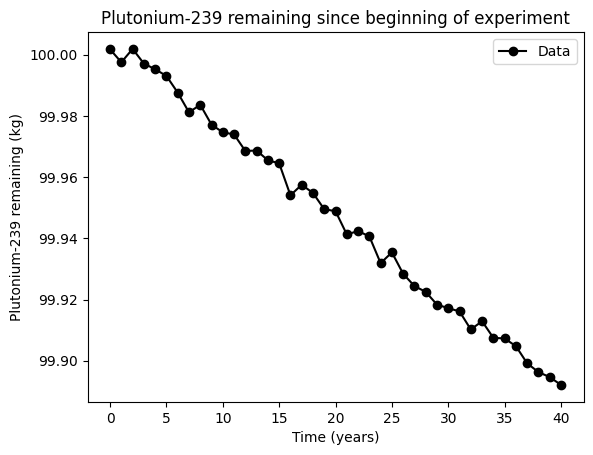

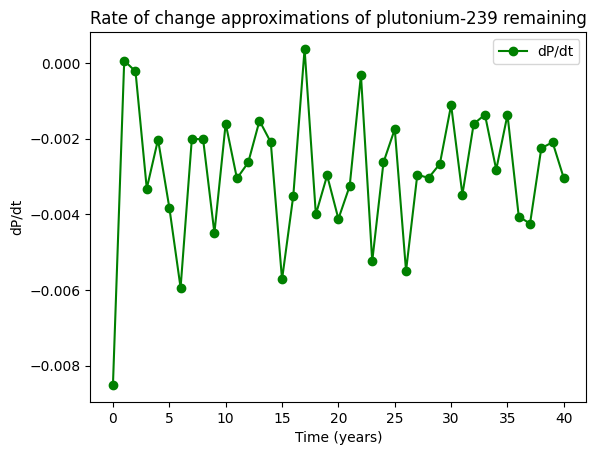

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Coding Problem 1
M = np.genfromtxt('Plutonium.csv', delimiter=',')

## Data plot
t = M[0, :]
P = M[1, :]

plt.figure()
plt.plot(t, P, '-ok')
plt.xlabel('Time (years)')
plt.ylabel('Plutonium-239 remaining (kg)')
plt.title('Plutonium-239 remaining since beginning of experiment')
plt.legend(['Data'])

## Derivative plot
h = t[1] - t[0] # Step size
A4 = (-3*P[0] + 4*P[1] - P[2])/(2*h) # Forward difference at t = 0
A5 = (3 * P[40] - 4 * P[39] + P[38]) / (2 * h) # Backward difference at t = 40

dP = [] # Array of central differences with forward and backward differences at the ends
dP.append(A4)
for i in range(1, 40):
    dP.append((P[i+1] - P[i-1]) / (2*h))

dP.append(A5)
A6 = np.array(dP)

plt.figure()
plt.plot(t, A6, '-og')
plt.xlabel('Time (years)')
plt.ylabel('dP/dt')
plt.title('Rate of change approximations of plutonium-239 remaining')
plt.legend(['dP/dt'])

##### Part (c)
We can see that the derivative at time t = 0 is a giant outlier when compared to the derivatives at any other points until t = 40, which I feel is the most confusing aspect of this plot. I think the reason for that is the error caused by the forward difference scheme approximation for t = 0 because the true value of the derivative at t = 0 should be 0, which should be the y-intercept of the plot.

The derivative is not a smooth curve because the function is not a smooth curve too. The derivative values are just the calculated slope values between every 2 points from t = 0 to t = 40. For a derivative to be a smooth curve, we would have to find its true value for which we would need the symbolic function and symbolic derivative functions. In this case, it would be a linear function with a constant function for the derivative.

##### Part (d)
Based on the answer above and the errors in the approximations, taking the mean of the calculated decay rate to calculate the half life is a good idea because the mean reduces the errors overall and takes you closest to the true value of the decay rate.

### Problem 2

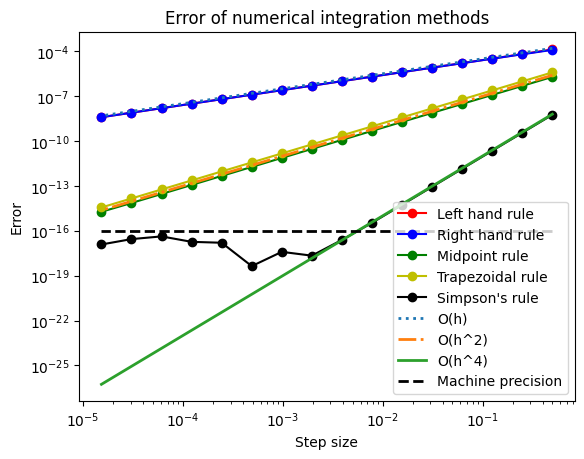

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# Coding Problem 2
mu = 85
sigma = 8.3
integrand = lambda x: np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
left = 110
right = 130

Int, err = scipy.integrate.quad(integrand, left, right)
A11 = Int # True value

power = -np.linspace(1, 16, 16)
h = 2 ** power

LHR = []

for dx in h:
    x = np.arange(left, right + dx, dx)
    y = integrand(x)
    S_approx = np.sum(y[:-1]) * dx
    LHR.append(S_approx)

A12 = np.array(LHR) # Left hand rule approximations

RHR = []

for dx in h:
    x = np.arange(left, right + dx, dx)
    y = integrand(x)
    S_approx = np.sum(y[1:]) * dx
    RHR.append(S_approx)

A13 = np.array(RHR) # Right hand rule approximations

midpoint_approx = []

for dx in h:
    x = np.arange(left, right + dx, dx)
    y = integrand(x)
    MPR = 0
    for i in range(x.size - 1):
        MPR += integrand((x[i] + x[i+1])/2) * dx
    midpoint_approx.append(MPR)

A14 = np.array(midpoint_approx) # Midpoint rule approximations

A15 = (A12 + A13) / 2 # Trapezoidal rule approximations

Simpson_approx = []

for dx in h:
    x = np.arange(left, right + dx, dx)
    y = integrand(x)
    simpson = (dx / 3)*(y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-2:2]) + y[-1])
    Simpson_approx.append(simpson)

A16 = np.array(Simpson_approx) # Simpson's rule approximations

# Error values
LHR_errors = np.abs(Int - A12)
RHR_errors = np.abs(Int - A13)
midpoint_errors = np.abs(Int - A14)
trapezoidal_errors = np.abs(Int - A15)
Simpson_errors = np.abs(Int - A16)

# Plotting
plt.figure()
plt.loglog(h, LHR_errors, '-or', label='Left hand rule')
plt.loglog(h, RHR_errors, '-ob', label='Right hand rule')
plt.loglog(h, midpoint_errors, '-og', label='Midpoint rule')
plt.loglog(h, trapezoidal_errors, '-oy', label='Trapezoidal rule')
plt.loglog(h, Simpson_errors, '-ok', label='Simpson\'s rule')

# Convergence of numerical integration methods
# LHR, RHR - O(h), midpoint - O(h^2), trapezoidal - O(h^2), Simpson - O(h^4)
plt.loglog(h, 10**(-3.5)*h, ':', label='O(h)', linewidth=2)
plt.loglog(h, 10**(-5)*h**2, '-.', label='O(h^2)', linewidth=2)
plt.loglog(h, 10**(-7)*h**4, '-', label='O(h^4)', linewidth=2)

# Machine precision line
plt.loglog(h, 10**(-16)*np.ones(h.size), '--k', label='Machine precision', linewidth=2)

plt.xlabel('Step size')
plt.ylabel('Error')
plt.title('Convergence of numerical integration schemes')
plt.legend()


##### Part (g)
i. Simpson's rule has the highest order of accuracy as we can see from the graph of its order O(h^4). The O(h^4) line has the highest slope, hence it is the most accurate.

ii. The true error values for Simpson's rule goes lower than the machine precision, hence the error stops decreasing.